# AI-Powered Data Analyst Assistant  
This project demonstrates the use of GPT-4 as a data analyst assistant that can summarize and provide insights from structured business data using natural language prompts.


## Import Required Libraries


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from dotenv import load_dotenv
load_dotenv()

# Set up OpenAI API key
from openai import OpenAI

# Create a client with API key
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))


## Generate Simulated Monthly Department Data (Jan–Dec)

This dataset includes cost and quality scores for three departments (Sales, Tech, HR) from January to December.


In [8]:
import random

# Define months and departments
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
departments = ["Sales", "Tech", "HR"]

# Create dummy data with random values
random.seed(42)
data = []

for month in months:
    for dept in departments:
        cost = random.randint(65000, 180000)  # simulate monthly cost
        quality_score = random.randint(70, 90)  # simulate quality score
        data.append({
            "Month": month,
            "Department": dept,
            "Cost": cost,
            "Quality_Score": quality_score
        })


In [10]:
# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,Month,Department,Cost,Quality_Score
0,Jan,Sales,148810,73
1,Jan,Tech,68278,78
2,Jan,HR,97098,77
3,Feb,Sales,83289,73
4,Feb,Tech,153696,87


## GPT Data Analysis Function

This function formats the data and sends a prompt to GPT-4 asking a custom question about the dataset.

In [13]:
# Ask GPT function using new API
def ask_gpt_about_data(df, question):
    sample_data = df.head(10).to_string(index=False)

    prompt = f"""
You are a helpful AI data analyst. Below is the data:
{sample_data}

Now, please answer the following question:
"{question}"

Make sure to explain your reasoning in a clear and simple way.
    """

    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "user", "content": prompt}
        ],
        temperature=0.4
    )

    return response.choices[0].message.content

## Ask GPT a Question

We can now ask GPT a business-related question about this dataset, such as identifying the most cost-efficient department.


In [16]:
# Define your question here
question = "Which department is the most cost-efficient over the first few months?"

# Get GPT's answer
answer = ask_gpt_about_data(df, question)

# Display the answer
print("GPT's Answer:")
print(answer)

GPT's Answer:
To determine the most cost-efficient department, we need to consider both the cost and the quality score. A lower cost and higher quality score would indicate higher efficiency.

Here's a breakdown of the average cost and quality score for each department over the first few months:

Sales: 
- Average cost: (148810 + 83289 + 120302) / 3 = 117467
- Average quality score: (73 + 73 + 71) / 3 = 72.33

Tech: 
- Average cost: (68278 + 153696 + 68905) / 3 = 97193
- Average quality score: (78 + 87 + 72) / 3 = 79

HR: 
- Average cost: (97098 + 76395 + 93657) / 3 = 89050
- Average quality score: (77 + 88 + 77) / 3 = 80.67

Based on these calculations, the HR department is the most cost-efficient over the first few months. It has the lowest average cost and the highest average quality score.


## Visualize Cost Trends

This line plot shows cost trends by department over the months.


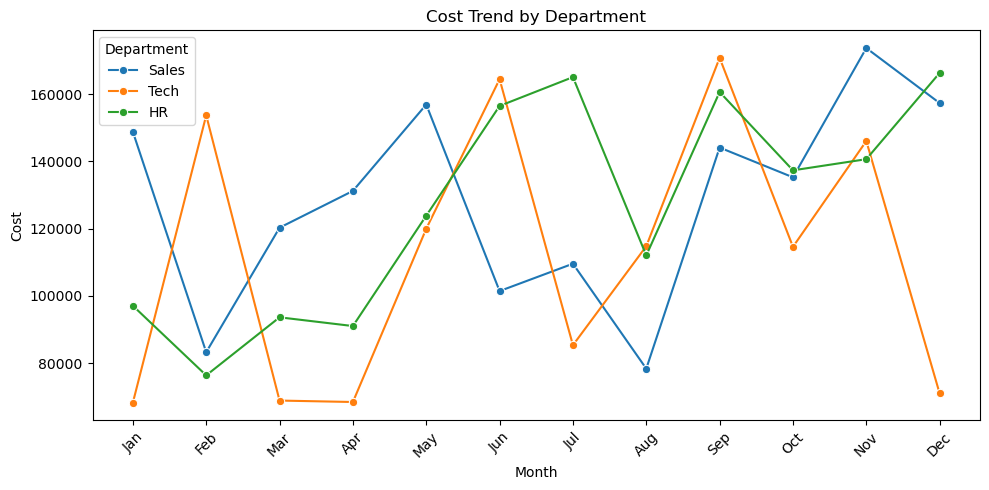

In [18]:
# Plot cost trend by department
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Month", y="Cost", hue="Department", marker="o")
plt.title("Cost Trend by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Generate a Summary of the Dataset

Here we ask GPT to summarize the dataset in three key insights.


In [20]:
# Ask GPT to summarize the full dataset
summary = ask_gpt_about_data(df, "Summarize the dataset in 3 bullet points")
print(summary)

1. The dataset represents the monthly cost and quality score for three different departments (Sales, Tech, and HR) within a company. The data is presented for the months of January, February, March, and April (though April only has data for the Sales department). The cost seems to be a monetary value, possibly representing the department's expenditure, while the quality score could be a measure of the department's performance or efficiency.

2. The Sales department has consistently the highest cost across all months, with the highest being in January at 148,810. However, its Quality Score fluctuates, with the lowest at 71 in March and the highest at 89 in April. The Tech department has the lowest cost in January and March, but the highest in February at 153,696. Its Quality Score also varies, with the highest score of 87 in February. The HR department has its costs and Quality Score relatively stable, with the cost peaking in January at 97,098 and the Quality Score peaking in February 